In [1]:
import pandas as pd
import datetime
from pathlib import Path

Short visualization of lane AMS-FRA-JNB_LH_DtD

In [2]:
OpenWeatherMap = pd.read_csv(Path('Materials/OpenWeatherMap/283bc5149218e9c8104cbc4d2369cd43.csv'))
OpenWeatherMap = OpenWeatherMap.drop(columns=['lat','lon','weather_icon'])
OpenWeatherMap['temp'] = OpenWeatherMap['temp'].sub(272,15)
OpenWeatherMap['temp_min'] = OpenWeatherMap['temp_min'].sub(272,15)
OpenWeatherMap['temp_max'] = OpenWeatherMap['temp_max'].sub(272,15)
OpenWeatherMap['feels_like'] = OpenWeatherMap['feels_like'].sub(272,15)

In [3]:
time0 = OpenWeatherMap[OpenWeatherMap.dt_iso.str.contains("01-01 12:00:00")]
time0.temp.sub(272.15);

In [4]:
OpenWeatherMap.dt = OpenWeatherMap.dt.astype('datetime64[s]')

Text(0.5, 1.0, 'First quarter of 1979')

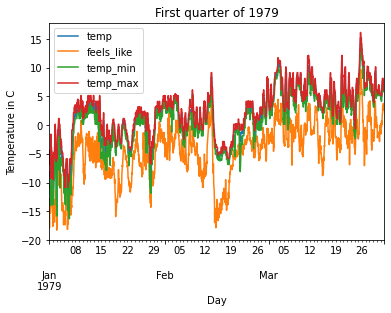

In [17]:
plt = OpenWeatherMap[0:90*24][['temp','feels_like','temp_min','temp_max']].plot()
plt.set_xlabel('Day')
plt.set_ylabel('Temperature in C')
plt.set_title('First quarter of 1979')

In [15]:
OpenWeatherMap[0:90*24]

,dt_iso,timezone,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description
dt,,,,,,,,,,,,,,,,,,,,,
1979-01-01 00:00:00,1979-01-01 00:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,-8.14,-14.58,-10.372,-6.850,1004,NaN,NaN,...,4.6,30,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds
1979-01-01 01:00:00,1979-01-01 01:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,-8.36,-17.87,-10.850,-4.761,1002,NaN,NaN,...,8.8,40,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds
1979-01-01 02:00:00,1979-01-01 02:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,-8.11,-14.26,-10.850,-4.847,1004,NaN,NaN,...,4.1,20,NaN,NaN,NaN,NaN,35,802,Clouds,scattered clouds
1979-01-01 03:00:00,1979-01-01 03:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,-8.49,-13.83,-10.850,-4.726,1005,NaN,NaN,...,3.0,20,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear
1979-01-01 04:00:00,1979-01-01 04:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,-8.58,-12.81,-10.850,-4.408,1009,NaN,NaN,...,1.5,20,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979-03-31 19:00:00,1979-03-31 19:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,6.58,3.52,5.984,7.150,1010,NaN,NaN,...,2.6,250,0.5,NaN,NaN,NaN,90,500,Rain,light rain
1979-03-31 20:00:00,1979-03-31 20:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,6.54,3.47,5.941,7.150,1010,NaN,NaN,...,2.6,230,0.5,NaN,NaN,NaN,90,500,Rain,light rain
1979-03-31 21:00:00,1979-03-31 21:00:00 +0000 UTC,3600,Amsterdam Airport Schiphol,6.12,2.62,5.796,6.150,1010,NaN,NaN,...,3.1,240,0.5,NaN,NaN,NaN,90,500,Rain,light rain


In [6]:
OpenWeatherMap = OpenWeatherMap.set_index('dt')

In [7]:
monthly = OpenWeatherMap.resample("M").mean()
yearly = OpenWeatherMap.resample("Y").mean()
daily = OpenWeatherMap.resample("D").mean()

Text(0.5, 1.0, 'Schiphol 1979')

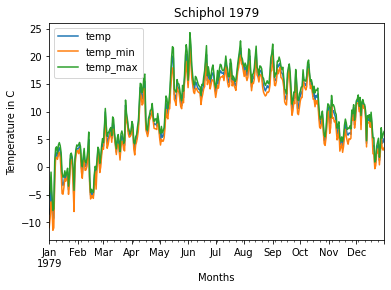

In [27]:
plt = daily[0:365][['temp','temp_min','temp_max']].plot()
plt.set_xlabel('Months')
plt.set_ylabel('Temperature in C')
plt.set_title('Schiphol 1979')

Text(0.5, 0, 'Year')

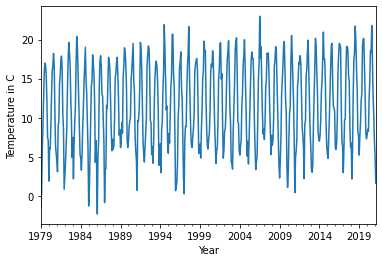

In [9]:
plt = monthly['temp'].plot()
plt.set_ylabel('Temperature in C')
plt.set_xlabel('Year')

Text(0.5, 0, 'Temperature in C')

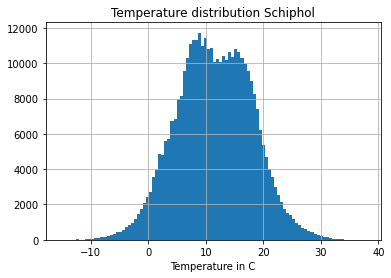

In [28]:
plt = OpenWeatherMap['temp'].hist(bins=100)
plt.set_title('Temperature distribution Schiphol')
plt.set_xlabel('Temperature in C')

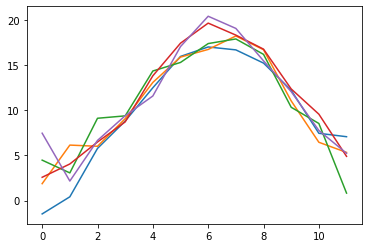

In [11]:
for i in range(0,60,12):
    temp = monthly[i:i+12]['temp']
    temp.index=range(0,12)
    temp.plot()

Text(0.5, 1.0, 'Mean temperature by year')

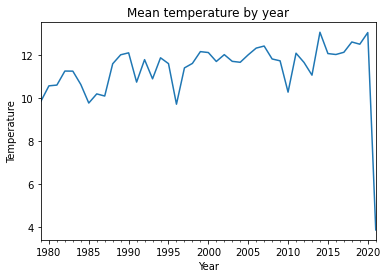

In [14]:
plt = yearly['temp'].plot()
plt.set_ylabel('Temperature')
plt.set_xlabel('Year')
plt.set_title('Mean temperature by year')

# MeteoBlue

In [21]:
MeteoBlue = pd.read_csv(Path('Materials\MeteoBlue\dataexport_20210401T195405_hi-res.csv'))

C:\Users\Flori\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
MeteoBlue

,location,O.R. Tambo International Airport,Frankfurt am Main,Brussels,Amsterdam,Dubai International Airport,Begumpet Airport,Shanghai Pudong International Airport,Chicago O'Hare International Airport,Comodoro Arturo Merino Benítez International Airport,...,Comodoro Arturo Merino Benítez International Airport.2,O.R. Tambo International Airport.3,Frankfurt am Main.3,Brussels.3,Amsterdam.3,Dubai International Airport.3,Begumpet Airport.3,Shanghai Pudong International Airport.3,Chicago O'Hare International Airport.3,Comodoro Arturo Merino Benítez International Airport.3
0,lat,-26.14984,50.11647,50.86329,52.37008,24.99988,17.49359,31.11631,41.99986,-33.40651,...,-33.40651,-26.14984,50.11647,50.86329,52.37008,24.99988,17.49359,31.11631,41.99986,-33.40651
1,lon,28.27415,8.69360,4.36938,4.91682,55.31250,78.46516,121.72454,-88.12500,-70.78083,...,-70.78083,28.27415,8.69360,4.36938,4.91682,55.31250,78.46516,121.72454,-88.12500,-70.78083
2,asl,1629.447,119.513,48.976,-1.531,82.283,553.200,5.429,226.966,506.974,...,506.974,1629.447,119.513,48.976,-1.531,82.283,553.200,5.429,226.966,506.974
3,variable,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature,...,Wind Speed,Wind Direction,Wind Direction,Wind Direction,Wind Direction,Wind Direction,Wind Direction,Wind Direction,Wind Direction,Wind Direction
4,unit,°C,°C,°C,°C,°C,°C,°C,°C,°C,...,km/h,°,°,°,°,°,°,°,°,°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54796,20210401T1900,20.590405,15.572336,10.916345,5.785546,20.607838,28.9908,13.885788,3.31878,23.430832,...,13.397612,270.0,11.309921,30.78415,21.104828,258.69006,305.83765,23.962494,10.060669,186.17018
54797,20210401T2000,20.290403,13.752337,9.086345,5.175546,20.477837,27.940802,13.835788,3.67878,23.120832,...,14.471821,270.0,16.798355,31.138962,24.702423,218.65982,295.55997,360.0,13.069305,185.71059
54798,20210401T2100,20.040403,11.932337,7.486344,4.695546,19.887836,26.770802,13.825788,3.78878,22.160833,...,14.440443,262.40536,19.025604,35.311203,26.029587,206.56505,292.9321,360.0,17.35402,184.28915
54799,20210401T2200,19.790403,10.132337,6.166345,4.265546,19.357838,24.8608,13.835788,3.56878,20.570833,...,12.620554,250.0169,21.801407,36.25383,24.775131,180.0,284.03625,8.130096,26.003342,183.2705


In [69]:
MeteoBlue['location'][9:] = MeteoBlue['location'][9:].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%dT%H%M'))

In [75]:
MeteoBlue = MeteoBlue.set_index('location')

In [91]:
ams = pd.to_numeric(MeteoBlue['Amsterdam'][9:])

Text(0.5, 1.0, 'Temperature Schiphol')

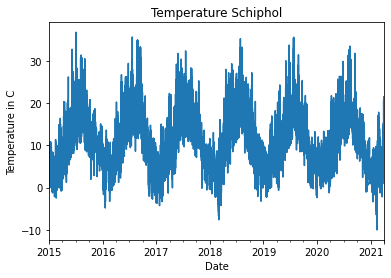

In [102]:
plt = ams.plot()
plt.set_xlabel('Date')
plt.set_ylabel('Temperature in C')
plt.set_title('Temperature Schiphol')